In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [29]:
prior_df <- read_tsv('full_priors/CrC.tsv.gz') %>% 
    mutate(
        degree_product = source_degree * target_degree,
        analytic_prior = degree_product / (degree_product - source_degree - target_degree
                                           + sum(edge) + 1),
        scaled_degree = degree_product / max(degree_product),
    )

Parsed with column specification:
cols(
  source_id = col_double(),
  target_id = col_double(),
  edge = col_logical(),
  source_degree = col_double(),
  target_degree = col_double(),
  xswap_prior = col_double()
)


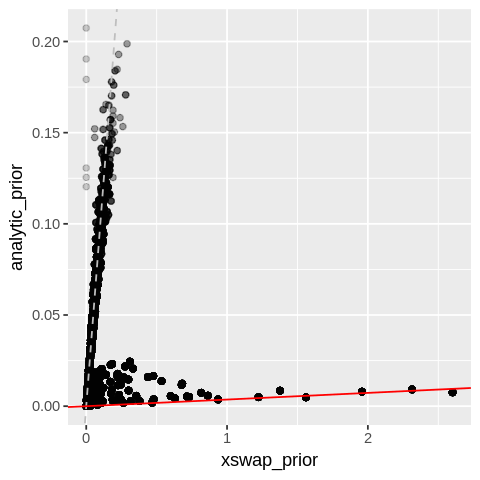

In [30]:
options(repr.plot.width=4, repr.plot.height=4)

fit <- lm(analytic_prior ~ xswap_prior, data = prior_df)

prior_df %>%
    ggplot(aes(x = xswap_prior, y = analytic_prior)) +
    geom_point(alpha = 0.2) +
    geom_abline(color = 'grey', linetype = 'dashed') +
    geom_abline(slope = fit$coefficients[2], intercept = 0, color = 'red')